# **Bike Sharing Demand Prediction**

### **Objective:**
The objective of this project is to develop a predictive model that can accurately forecast the demand for bike rentals on an hourly basis. By understanding the factors influencing bike rentals, the model aims to assist the bike-sharing service in optimizing its operations, managing bike inventory, and enhancing customer satisfaction.

### **Background:**
Bike-sharing systems have gained popularity as an eco-friendly and convenient mode of urban transportation. Accurate demand prediction is crucial for these systems to function efficiently. It enables better allocation of bikes, reduces customer wait times, and ensures availability across different locations. Effective demand forecasting can lead to cost savings, improved service quality, and increased user satisfaction.

### **Data Description:**
The dataset contains historical data on bike rentals, along with various environmental and seasonal information. The key features in the dataset include:

1. Date: Timestamp of the record. Rented_Bike_Count: Number of bikes rented at each hour.
2. Temperature(°C): Hourly temperature in Celsius.
3. Humidity(%): Hourly humidity in percentage.
4. Wind_speed(m/s): Hourly wind speed in meters per second.
5. Visibility(10m): Hourly visibility in meters.
6. Dew_point_temperature(°C): Dew point temperature in Celsius.
7. Solar_Radiation(MJ/m2): Hourly solar radiation in megajoules per square meter.
8. Rainfall(mm): Hourly rainfall in millimeters.
9. Snowfall(cm): Hourly snowfall in centimeters.
10. Seasons: Seasons (Winter, Spring, Summer, Fall).
11. Holiday: Whether the day is a holiday or not.
12. Functioning Day: Whether the day is a functioning day or not.

In [ ]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the seol bike data set from drive
df = pd.read_csv('/content/drive/MyDrive/Regression - Bike Sharing Demand Prediction/SeoulBikeData.csv', encoding ='latin')

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Dataset Rows & Columns count
print(df.shape)

(8760, 14)


In [ ]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Rename the complex columns name
bike_df = df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature(°C)',
                                'Humidity(%)':'Humidity(%)',
                                'Wind speed (m/s)':'Wind_speed(m/s)',
                                'Visibility (10m)':'Visibility(10m)',
                                'Dew point temperature(°C)':'Dew_point_temperature(°C)',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation(MJ/m2)',
                                'Rainfall(mm)':'Rainfall(mm)',
                                'Snowfall (cm)':'Snowfall(cm)',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
# drop the Dew point temperature column
bike_df = bike_df.drop(['Dew_point_temperature(°C)'],axis=1)

In [ ]:
# Breaking date column

# Changing the "Date" column into three "year","month","day" column
# bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day_name()

#creating a new column of "weekdays_weekend" and drop the column "Date", "year"
bike_df['Weekdays_Weekend'] = bike_df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','Year'],axis=1)

# Changing the datatype of Hour, Season, Holiday, Functioning Day, Month, Day, Weekdays_Weekend column into catagory column
categorical_variables = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
bike_df[categorical_variables] = bike_df[categorical_variables].astype('category')

In [ ]:
# Changing the datatype of Hour, Season, Holiday, Functioning Day, Month, Day, Weekdays_Weekend column into catagory column
categorical_variables = ['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
bike_df[categorical_variables] = bike_df[categorical_variables].astype('category')

In [ ]:
# Identify categorical variables
categorical_variables = [var for var in bike_df.columns if bike_df[var].dtype in ['category']]

# Identify numerical variables
numerical_variables = [var for var in bike_df.columns if bike_df[var].dtype in ['int64', 'float64']]

print(categorical_variables)
print(numerical_variables)

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)']


In [ ]:
# Method 1- Inter Quartile Range for removing outliers from numerical variables

# Capping dataset to remove outliers
for i in numerical_variables:
    # Calculate IQR
    Q1 = bike_df[i].quantile(0.25)
    Q3 = bike_df[i].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Apply lower and upper limits to cap the outliers
    bike_df.loc[bike_df[i] > upper_limit, i] = upper_limit
    bike_df.loc[bike_df[i] < lower_limit, i] = lower_limit

In [ ]:
# Transforming distribution to normal using different transformations

# For positively skewed data
bike_df['Rented_Bike_Count'] = (bike_df['Rented_Bike_Count'] + 1).transform(np.sqrt)
bike_df['Wind_speed(m/s)'] = (bike_df['Wind_speed(m/s)']+1).transform(np.log)
bike_df['Solar_Radiation(MJ/m2)'] = (bike_df['Solar_Radiation(MJ/m2)']+1).transform(np.log)

# For negatively skewed data
bike_df['Visibility(10m)']=(max(bike_df['Visibility(10m)']+1)-bike_df['Visibility(10m)']).transform(np.sqrt)

# For large skewed data
bike_df['Rainfall(mm)'] = (bike_df['Rainfall(mm)']+1).transform(np.log)
bike_df['Snowfall(cm)'] = (bike_df['Snowfall(cm)']+1).transform(np.log)

In [ ]:
# Create a copy of the original dataset
bike_df_1 = bike_df.copy()

# Function to apply one-hot encoding to a specific column
def one_hot_encoding(data, column):
    # Generate dummy variables
    dummies = pd.get_dummies(data[column], prefix=column, drop_first=True)
    # drop_first=True, drops one of the categories to avoid multicollinearity issues in linear models.
    # This means that for each categorical variable, one of its categories is dropped and encoded into
    # a column of zeros, while the rest are encoded into columns of ones.

    # Convert boolean to integers (0 and 1)
    dummies = dummies.astype(int)
    # When using one-hot encoding with 'get_dummies()', sometimes we get 'True' and 'False' values that
    # are actually Boolean values. However, since we're dealing with categorical string data, we need to
    # ensure that the output is converted to 0s and 1s so we convert the dummy variables to int.


    # Concatenate the original DataFrame with the dummy variables
    data = pd.concat([data, dummies], axis=1)
    # Drop the original categorical column
    data = data.drop([column], axis=1)
    return data

# Apply one-hot encoding to each categorical variable
for col in categorical_variables:
    bike_df_1 = one_hot_encoding(bike_df_1, col)

# Display the first few rows of the modified DataFrame
bike_df_1.head()

,Rented_Bike_Count,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Hour_1,Hour_2,...,Month_10,Month_11,Month_12,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Weekdays_Weekend_1
0,15.968719,-5.2,37,1.163151,1.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,14.317821,-5.5,38,0.587787,1.0,0.0,0.0,0.0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,13.190906,-6.0,39,0.693147,1.0,0.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,10.392305,-6.2,40,0.641854,1.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,8.888194,-6.0,36,1.193922,1.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
bike_df_1.columns

Index(['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind_speed(m/s)', 'Visibility(10m)', 'Solar_Radiation(MJ/m2)',
       'Rainfall(mm)', 'Snowfall(cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning_Day_Yes', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Weekdays_Weekend_1'],
      dtype='object')

In [ ]:
#Assign the value in X and Y
independent_features = bike_df_1.drop(columns = ['Rented_Bike_Count'], axis = 1)
dependent_features = bike_df_1['Rented_Bike_Count']

In [ ]:
independent_features.head()

,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Hour_1,Hour_2,Hour_3,...,Month_10,Month_11,Month_12,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Weekdays_Weekend_1
0,-5.2,37,1.163151,1.0,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-5.5,38,0.587787,1.0,0.0,0.0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-6.0,39,0.693147,1.0,0.0,0.0,0.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,-6.2,40,0.641854,1.0,0.0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,-6.0,36,1.193922,1.0,0.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
dependent_features.head()

,Rented_Bike_Count
0,15.968719
1,14.317821
2,13.190906
3,10.392305
4,8.888194


In [ ]:
# Assuming independent_features is a DataFrame and dependent_features is a Series
independent_features = pd.DataFrame(independent_features)  # Ensure it's a DataFrame
dependent_features = pd.Series(dependent_features)  # Ensure it's a Series

scaler = MinMaxScaler()

# Scale independent features
independent_features_scaled = scaler.fit_transform(independent_features)

# Scale dependent features, convert to numpy array and reshape
dependent_features_scaled = scaler.fit_transform(dependent_features.values.reshape(-1, 1))

# Convert the scaled independent features back to a DataFrame
independent_features_scaled = pd.DataFrame(independent_features_scaled, columns=independent_features.columns)

# Convert the scaled dependent features back to a Series
dependent_features_scaled = pd.Series(dependent_features_scaled.flatten(), name=dependent_features.name)

# **ML Models**

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_features_scaled,dependent_features_scaled, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6570, 53)
(2190, 53)


In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      Temperature(°C)  Humidity(%)  Wind_speed(m/s)  Visibility(10m)  \
8639         0.377622     0.846939         0.439954         0.901163   
3614         0.730769     0.479592         0.707972         0.863090   
1387         0.187063     0.336735         0.651455         0.222822   
3900         0.526224     0.989796         0.348545         0.943780   
8044         0.374126     0.714286         0.348545         0.165448   
...               ...          ...              ...              ...   
4373         0.622378     0.765306         0.411022         0.624566   
7891         0.597902     0.479592         0.411022         0.380417   
4859         0.756993     0.581633         0.610543         0.725929   
3264         0.456294     0.602041         0.670898         0.194198   
2732         0.435315     0.846939         0.864929         0.953329   

      Solar_Radiation(MJ/m2)  Rainfall(mm)  Snowfall(cm)  Hour_1  Hour_2  \
8639                0.000000           0.0           0.0   

#### **1. Linear regression model**

In [ ]:
# Fitting the data
lin_reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for test set

y_pred_train_LR = lin_reg.predict(X_train)
y_pred_test_LR = lin_reg.predict(X_test)

In [ ]:
# Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_LR_train = mean_squared_error((y_train), (y_pred_train_LR))
RMSE_LR_train =np.sqrt(MSE_LR_train)
MAE_LR_train = mean_absolute_error(y_train, y_pred_train_LR)
r2_LR_train = r2_score(y_train, y_pred_train_LR)
Adjusted_R2_LR_train = (1-(1-r2_score(y_train, y_pred_train_LR))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Linear Regression Train set Evaluation Metrics")
print("MSE :", round((MSE_LR_train), 3))
print("RMSE :", round((RMSE_LR_train), 3))
print("MAE :", round((MAE_LR_train), 3))
print("R2 :", round((r2_LR_train), 3))
print("Adjusted R2 :", round((Adjusted_R2_LR_train), 3))

Linear Regression Train set Evaluation Metrics
MSE : 0.016
RMSE : 0.126
MAE : 0.095
R2 : 0.758
Adjusted R2 : 0.752


In [ ]:
# Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_LR_test = mean_squared_error(y_test, y_pred_test_LR)
RMSE_LR_test =np.sqrt(MSE_LR_test)
MAE_LR_test = mean_absolute_error(y_test, y_pred_test_LR)
r2_LR_test = r2_score((y_test), (y_pred_test_LR))
Adjusted_R2_LR_test = (1-(1-r2_score((y_test), (y_pred_test_LR)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Linear Regression Test set Evaluation Metrics")
print("MSE :", round((MSE_LR_test), 3))
print("RMSE :", round((RMSE_LR_test), 3))
print("MAE :", round((MAE_LR_test), 3))
print("R2 :", round((r2_LR_test), 3))
print("Adjusted R2 :", round((Adjusted_R2_LR_test), 3))

Linear Regression Test set Evaluation Metrics
MSE : 0.015
RMSE : 0.124
MAE : 0.094
R2 : 0.768
Adjusted R2 : 0.763


**Conclusions:**

- Train set's R2 score value =  0.79, that means our model is able to capture most of the data variance.

- Test set's r2_score = 0.80. This means our linear model is performing well on the data.

#### **2. DECISION TREE**

In [ ]:
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse',
                                           max_depth=8,
                                           max_features=9,
                                           max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

#get the X_train and X-test value
y_pred_train_DT = decision_regressor.predict(X_train)
y_pred_test_DT = decision_regressor.predict(X_test)

In [ ]:
# Decision Tree Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_DT_train = mean_squared_error(y_train, y_pred_train_DT)
RMSE_DT_train = np.sqrt(MSE_DT_train)
MAE_DT_train = mean_absolute_error(y_train, y_pred_train_DT)
r2_DT_train = r2_score(y_train, y_pred_train_DT)
Adjusted_R2_DT_train = (1-(1-r2_score(y_train, y_pred_train_DT))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Decision Tree Train set Evaluation Metrics")
print("MSE :", round((MSE_DT_train), 3))
print("RMSE :", round((RMSE_DT_train), 3))
print("MAE :", round((MAE_DT_train), 3))
print("R2 :", round((r2_DT_train), 3))
print("Adjusted R2 :", round((Adjusted_R2_DT_train), 3))

Decision Tree Train set Evaluation Metrics
MSE : 0.025
RMSE : 0.159
MAE : 0.115
R2 : 0.616
Adjusted R2 : 0.606


In [ ]:
# Decision Tree Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_DT_test = mean_squared_error(y_test, y_pred_test_DT)
RMSE_DT_test =np.sqrt(MSE_DT_test)
MAE_DT_test = mean_absolute_error(y_test, y_pred_test_DT)
r2_DT_test = r2_score((y_test), (y_pred_test_DT))
Adjusted_R2_DT_test =(1-(1-r2_score((y_test), (y_pred_test_DT)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Decision Tree Test set Evaluation Metrics")
print("MSE :", round((MSE_DT_test), 3))
print("RMSE :", round((RMSE_DT_test), 3))
print("MAE :", round((MAE_DT_test), 3))
print("R2 :", round((r2_DT_test), 3))
print("Adjusted R2 :", round((Adjusted_R2_DT_test), 3))

Decision Tree Test set Evaluation Metrics
MSE : 0.029
RMSE : 0.17
MAE : 0.121
R2 : 0.566
Adjusted R2 : 0.555


**Conclusions:**

Looks like our train set's r2 score value is 0.70, that means our model is  able to capture most of the data variance.

The r2_score for the test set is 0.68. This means our linear model is  performing well on the data.

#### **3. Random Forest**

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_train_RF = rf_model.predict(X_train)
y_pred_test_RF = rf_model.predict(X_test)

In [ ]:
# Random Forest Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_RF_train = mean_squared_error(y_train, y_pred_train_RF)
RMSE_RF_train = np.sqrt(MSE_RF_train)
MAE_RF_train = mean_absolute_error(y_train, y_pred_train_RF)
r2_RF_train = r2_score(y_train, y_pred_train_RF)
Adjusted_R2_RF_train = (1-(1-r2_score(y_train, y_pred_train_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Train set Evaluation Metrics")
print("MSE :", round((MSE_RF_train), 3))
print("RMSE :", round((RMSE_RF_train), 3))
print("MAE :", round((MAE_RF_train), 3))
print("R2 :", round((r2_RF_train), 3))
print("Adjusted R2 :", round((Adjusted_R2_RF_train), 3))

Random Forest Train set Evaluation Metrics
MSE : 0.001
RMSE : 0.029
MAE : 0.017
R2 : 0.988
Adjusted R2 : 0.987


In [ ]:
# Random Forest Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_RF_test = mean_squared_error(y_test, y_pred_test_RF)
RMSE_RF_test = np.sqrt(MSE_RF_test)
MAE_RF_test = mean_absolute_error(y_test, y_pred_test_RF)
r2_RF_test = r2_score((y_test), (y_pred_test_RF))
Adjusted_R2_RF_test = (1-(1-r2_score((y_test), (y_pred_test_RF)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Test set Evaluation Metrics")
print("MSE :", round((MSE_RF_test), 3))
print("RMSE :", round((RMSE_RF_test), 3))
print("MAE :", round((MAE_RF_test), 3))
print("R2 :", round((r2_RF_test), 3))
print("Adjusted R2 :", round((Adjusted_R2_RF_test), 3))

Random Forest Test set Evaluation Metrics
MSE : 0.006
RMSE : 0.078
MAE : 0.047
R2 : 0.909
Adjusted R2 : 0.907


**Conclusions:**

Looks like our train set's r2 score value is 0.98 that means our model is  able to capture most of the data variance.

The r2_score for the test set is 0.91. This means our linear model is  performing well on the data.



##### **FEATURES STORED**

                   Feature  Feature Importance
0          Temperature(°C)                0.31
1              Humidity(%)                0.18
34     Functioning_Day_Yes                0.15
4   Solar_Radiation(MJ/m2)                0.04
10                  Hour_4                0.03
9                   Hour_3                0.02
25                 Hour_19                0.02
24                 Hour_18                0.02
11                  Hour_5                0.02
52      Weekdays_Weekend_1                0.02
8                   Hour_2                0.01
23                 Hour_17                0.01
2          Wind_speed(m/s)                0.01
32          Seasons_Winter                0.01
29                 Hour_23                0.01
28                 Hour_22                0.01
27                 Hour_21                0.01
3          Visibility(10m)                0.01
26                 Hour_20                0.01
12                  Hour_6                0.01
13           

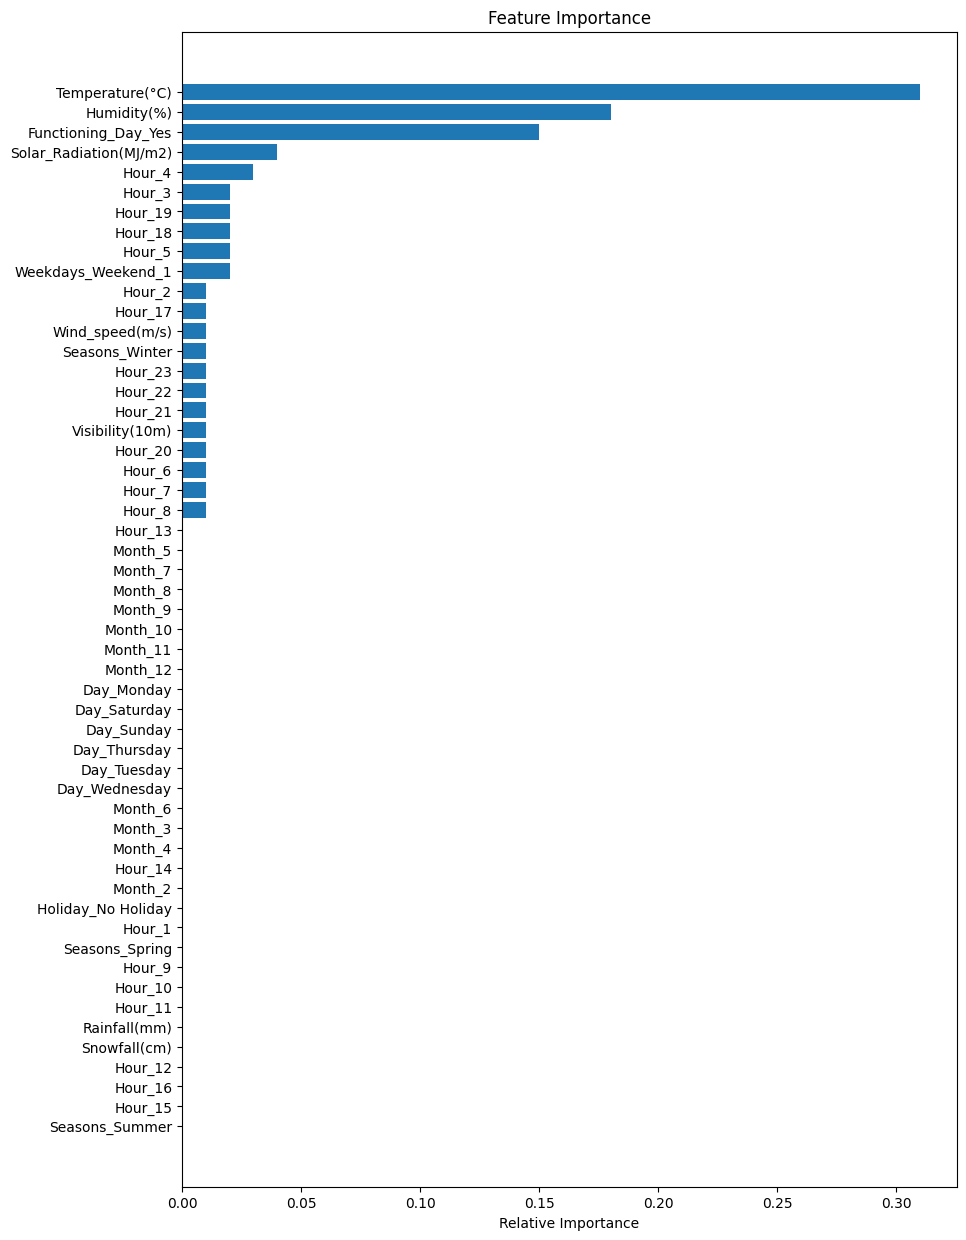

In [ ]:
# Fit the model
rf_model = RandomForestRegressor(random_state=2019)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importances
importance_dict = {'Feature': features, 'Feature Importance': importances}
importance_df = pd.DataFrame(importance_dict)

# Round the feature importances for better readability
importance_df['Feature Importance'] = round(importance_df['Feature Importance'], 2)

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by='Feature Importance', ascending=False)
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.title('Feature Importance')
plt.barh(range(len(importance_df)), importance_df['Feature Importance'])    # align='center'
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

#### **4. GRADIENT BOOSTING**

In [ ]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

# Making predictions on train and test data
y_pred_train_GB = gb_model.predict(X_train)
y_pred_test_GB = gb_model.predict(X_test)

In [ ]:
# Gradient Boosting Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_GB_train = mean_squared_error(y_train, y_pred_train_GB)
RMSE_GB_train = np.sqrt(MSE_GB_train)
MAE_GB_train = mean_absolute_error(y_train, y_pred_train_GB)
r2_GB_train = r2_score(y_train, y_pred_train_GB)
Adjusted_R2_GB_train = (1-(1-r2_score(y_train, y_pred_train_GB))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Train set Evaluation Metrics")
print("MSE :", round((MSE_GB_train), 3))
print("RMSE :", round((RMSE_GB_train), 3))
print("MAE :", round((MAE_GB_train), 3))
print("R2 :", round((r2_GB_train), 3))
print("Adjusted R2 :", round((Adjusted_R2_GB_train), 3))

Gradient Boosting Train set Evaluation Metrics
MSE : 0.009
RMSE : 0.095
MAE : 0.07
R2 : 0.862
Adjusted R2 : 0.859


In [ ]:
# Gradient Boosting Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_GB_test = mean_squared_error(y_test, y_pred_test_GB)
RMSE_GB_test = np.sqrt(MSE_GB_test)
MAE_GB_test = mean_absolute_error(y_test, y_pred_test_GB)
r2_GB_test = r2_score((y_test), (y_pred_test_GB))
Adjusted_R2_GB_test = (1-(1-r2_score((y_test), (y_pred_test_GB)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Test set Evaluation Metrics")
print("MSE :", round((MSE_GB_test), 3))
print("RMSE :", round((RMSE_GB_test), 3))
print("MAE :", round((MAE_GB_test), 3))
print("R2 :", round((r2_GB_test), 3))
print("Adjusted R2 :", round((Adjusted_R2_GB_test), 3))

Gradient Boosting Test set Evaluation Metrics
MSE : 0.01
RMSE : 0.1
MAE : 0.075
R2 : 0.849
Adjusted R2 : 0.845


**Conclusions:**

Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance.

The r2_score for the test set is 0.86. This means our linear model is  performing well on the data.

##### **FEATURES STORED**

                   Feature  Feature Importance
0          Temperature(°C)                0.33
1              Humidity(%)                0.19
34     Functioning_Day_Yes                0.17
4   Solar_Radiation(MJ/m2)                0.05
10                  Hour_4                0.03


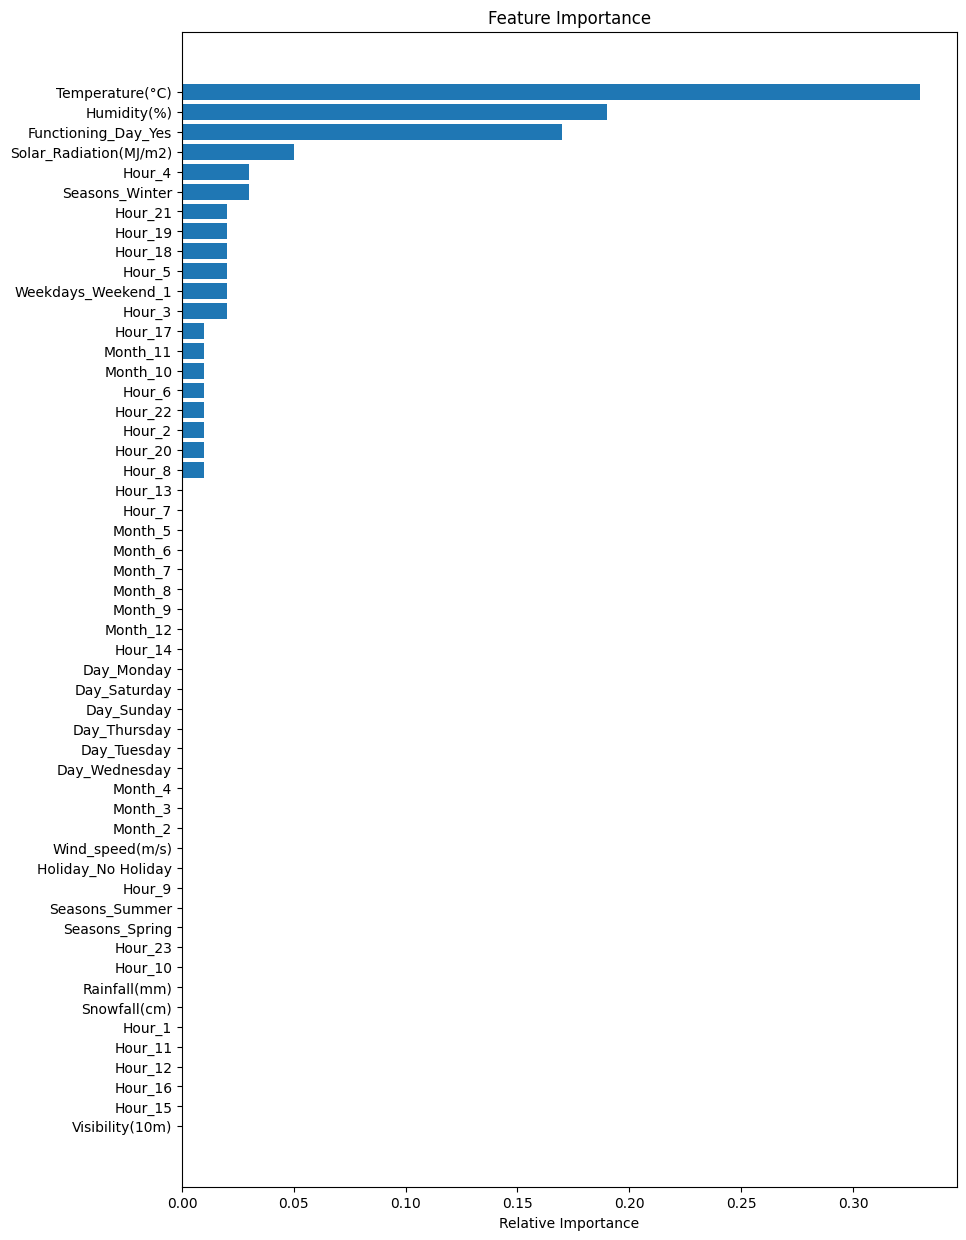

In [ ]:
# Fit the model
gb_model = GradientBoostingRegressor(random_state=2019)
gb_model.fit(X_train, y_train)

# Extract feature importances
importances = gb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for feature importances
importance_dict = {'Feature': features, 'Feature Importance': importances}
importance_df = pd.DataFrame(importance_dict)

# Round the feature importances for better readability
importance_df['Feature Importance'] = round(importance_df['Feature Importance'], 2)

# Sort the DataFrame by feature importance
importance_df = importance_df.sort_values(by='Feature Importance', ascending=False)

# Display the top features
print(importance_df.head())

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.title('Feature Importance')
plt.barh(range(len(importance_df)), importance_df['Feature Importance'])    #, color='blue', align='center'
plt.yticks(range(len(importance_df)), importance_df['Feature'])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

### **Hyperparameter Tuning**

**5. Random Forest**

In [ ]:
# Define hyperparameters for tuning
param_dict = {
    'n_estimators': [50, 80, 100],                        # 30, 120, 150
    'max_depth': [8, 10, 12],                             # 4, 6,
    'min_samples_split': [20, 50, 80],                    # 100, 150, 200
    'min_samples_leaf': [10, 30, 40]                      # 50, 60, 80
}

In [ ]:
# Create an instance of the Random Forest Regressor
rf_model = RandomForestRegressor()

# Perform Grid Search
rf_random = GridSearchCV(rf_model, param_dict, verbose=2, cv=5)   #n_jobs=-1
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   1.1s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=50; total time=   0.9s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=20, n_estimators=80; total time=   1.3s
[CV] END max_depth=8, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [10, 30, 40],
                         'min_samples_split': [20, 50, 80],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
# Best estimator
rf_optimal_model = rf_random.best_estimator_
print(rf_optimal_model)

RandomForestRegressor(max_depth=12, min_samples_leaf=10, min_samples_split=20)


In [ ]:
# Predictions
y_pred_train_HRF = rf_optimal_model.predict(X_train)
y_pred_test_HRF = rf_optimal_model.predict(X_test)

In [ ]:
# Random Forest Hyperparameter Tuning Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HRF_train = mean_squared_error(y_train, y_pred_train_HRF)
RMSE_HRF_train = np.sqrt(MSE_HRF_train)
MAE_HRF_train = mean_absolute_error(y_train, y_pred_train_HRF)
r2_HRF_train = rf_optimal_model.score(X_train, y_train)
Adjusted_R2_HRF_train = 1 - (1 - r2_HRF_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Hyperparameter Tuning Train set Evaluation Metrics")
print("MSE:", round((MSE_HRF_train), 3))
print("RMSE:", round((RMSE_HRF_train), 3))
print("MAE:", round((MAE_HRF_train), 3))
print("R2:", round((r2_HRF_train), 3))
print("Adjusted R2:", round((Adjusted_R2_HRF_train), 3))

Random Forest Hyperparameter Tuning Train set Evaluation Metrics
MSE: 0.008
RMSE: 0.091
MAE: 0.063
R2: 0.874
Adjusted R2: 0.873


In [ ]:
# Random Forest Hyperparameter Tuning Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HRF_test = mean_squared_error(y_test, y_pred_test_HRF)
RMSE_HRF_test = np.sqrt(MSE_HRF_test)
MAE_HRF_test = mean_absolute_error(y_test, y_pred_test_HRF)
r2_HRF_test = r2_score(y_test, y_pred_test_HRF)
Adjusted_R2_HRF_test = 1 - (1 - r2_HRF_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Random Forest Hyperparameter Tuning Test set Evaluation Metrics")
print("MSE:", round((MSE_HRF_test), 3))
print("RMSE:", round((RMSE_HRF_test), 3))
print("MAE:", round((MAE_HRF_test), 3))
print("R2:", round((r2_HRF_test), 3))
print("Adjusted R2:", round((Adjusted_R2_HRF_test), 3))

Random Forest Hyperparameter Tuning Test set Evaluation Metrics
MSE: 0.01
RMSE: 0.101
MAE: 0.07
R2: 0.846
Adjusted R2: 0.842


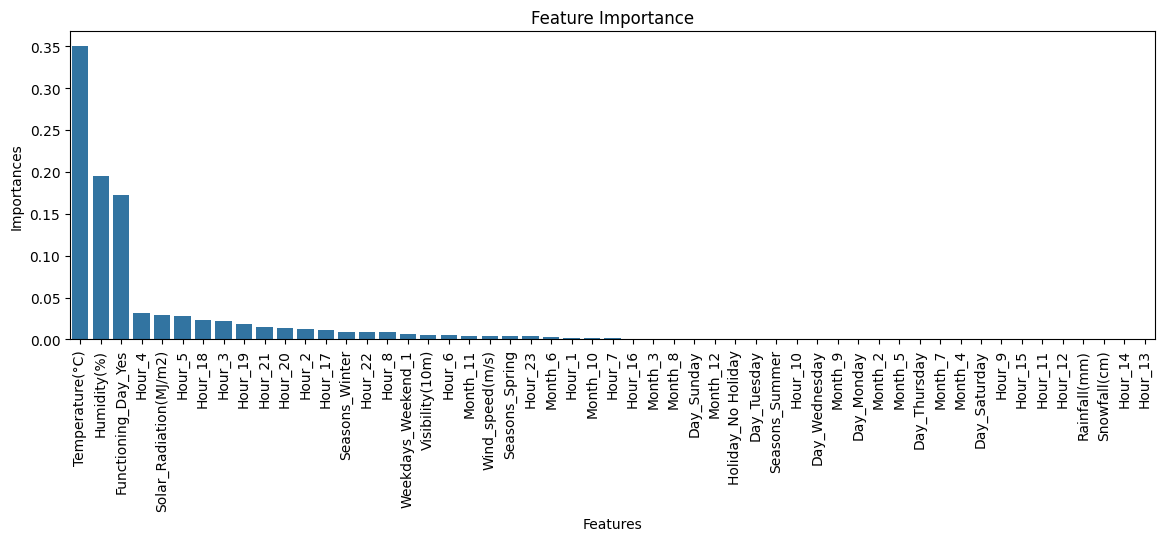

In [ ]:
# Feature Importance
importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importances': rf_optimal_model.feature_importances_
})
importances.sort_values(by='Importances', ascending=False, inplace=True)

plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature Importance')
plt.show()

**6. Gradient Boosting**

In [ ]:
# Define hyperparameters for tuning
param_dict = {
    'n_estimators': [50, 80, 100],
    'max_depth': [4, 6, 8],
    'min_samples_split': [50, 100, 150],
    'min_samples_leaf': [40, 50]
}

In [ ]:
# Create an instance of the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(learning_rate=0.05, random_state=42)

# Perform Randomized Search
gb_random = GridSearchCV(gb_model, param_dict, verbose=2, cv=5)   #, n_iter=10, random_state=42
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
# Best estimator
gb_optimal_model = gb_random.best_estimator_
print(gb_optimal_model)

GradientBoostingRegressor(learning_rate=0.05, max_depth=8, min_samples_leaf=40,
                          min_samples_split=50, random_state=42)


In [ ]:
# Predictions
y_pred_train_HGB = gb_optimal_model.predict(X_train)
y_pred_test_HGB = gb_optimal_model.predict(X_test)

In [ ]:
# Gradient Boosting Hyperparameter Tuning Train Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HGB_train = mean_squared_error(y_train, y_pred_train_HGB)
RMSE_HGB_train = np.sqrt(MSE_HGB_train)
MAE_HGB_train = mean_absolute_error(y_train, y_pred_train_HGB)
r2_HGB_train = gb_optimal_model.score(X_train, y_train)
Adjusted_R2_HGB_train = 1 - (1 - r2_HGB_train) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Hyperparameter Tuning Train set Evaluation Metrics")
print("MSE:", round((MSE_HGB_train), 3))
print("RMSE:", round((RMSE_HGB_train), 3))
print("MAE:", round((MAE_HGB_train), 3))
print("R2:", round((r2_HGB_train), 3))
print("Adjusted R2:", round((Adjusted_R2_HGB_train), 3))

Gradient Boosting Hyperparameter Tuning Train set Evaluation Metrics
MSE: 0.006
RMSE: 0.074
MAE: 0.051
R2: 0.916
Adjusted R2: 0.915


In [ ]:
# Gradient Boosting Hyperparameter Tuning Test Set Evaluation Metrics

# Calculating MSE, RMSE, MAE, R2 and adjusted R2
MSE_HGB_test = mean_squared_error(y_test, y_pred_test_HGB)
RMSE_HGB_test = np.sqrt(MSE_HGB_test)
MAE_HGB_test = mean_absolute_error(y_test, y_pred_test_HGB)
r2_HGB_test = r2_score(y_test, y_pred_test_HGB)
Adjusted_R2_HGB_test = 1 - (1 - r2_HGB_test) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Printing MSE, RMSE, MAE, R2 and adjusted R2 values
print("Gradient Boosting Hyperparameter Tuning Test set Evaluation Metrics")
print("MSE:", round((MSE_HGB_test), 3))
print("RMSE:", round((RMSE_HGB_test), 3))
print("MAE:", round((MAE_HGB_test), 3))
print("R2:", round((r2_HGB_test), 3))
print("Adjusted R2:", round((Adjusted_R2_HGB_test), 3))

Gradient Boosting Hyperparameter Tuning Test set Evaluation Metrics
MSE: 0.007
RMSE: 0.085
MAE: 0.06
R2: 0.891
Adjusted R2: 0.888


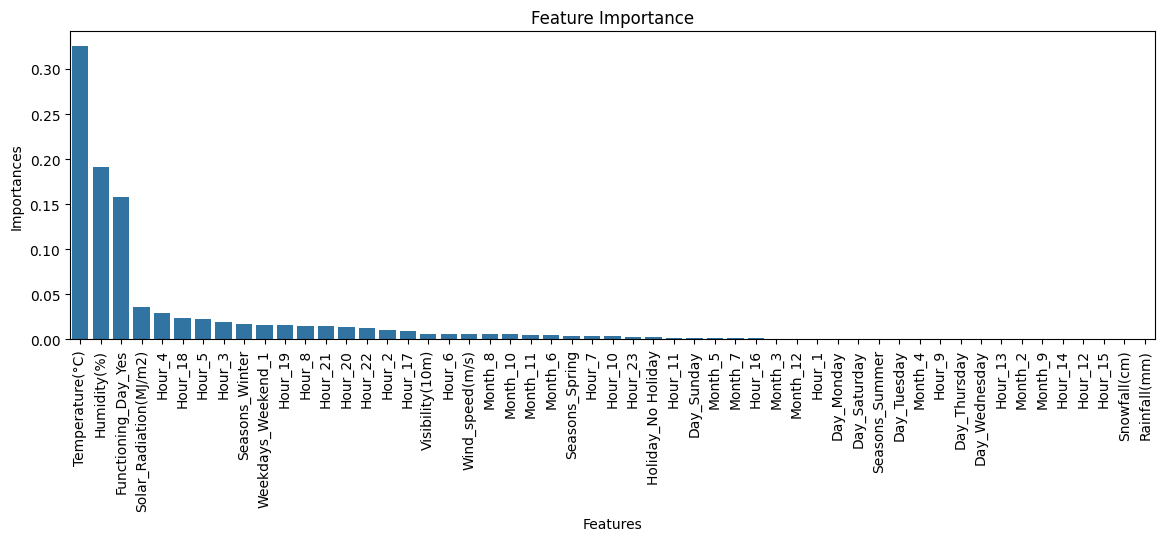

In [ ]:
# Feature Importance
importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importances': gb_optimal_model.feature_importances_
})
importances.sort_values(by='Importances', ascending=False, inplace=True)

plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature Importance')
plt.show()

In [ ]:
# Create a dictionary to store the data
data = {
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Gradient Boosting',
        'Random Forest Hyperparameter Tuning',
        'Gradient Boosting Hyperparameter Tuning'
    ],
    'MSE_Train': [round(MSE_LR_train, 3), round(MSE_DT_train, 3), round(MSE_RF_train, 3), round(MSE_GB_train, 3), round(MSE_HRF_train, 3), round(MSE_HGB_train, 3)],
    'RMSE_Train': [round(RMSE_LR_train, 3), round(RMSE_DT_train, 3), round(RMSE_RF_train, 3), round(RMSE_GB_train, 3), round(RMSE_HRF_train, 3), round(RMSE_HGB_train, 3)],
    'MAE_Train': [round(MAE_LR_train, 3), round(MAE_DT_train, 3), round(MAE_RF_train, 3), round(MAE_GB_train, 3), round(MAE_HRF_train, 3), round(MAE_HGB_train, 3)],
    'R2_Train': [round(r2_LR_train, 3), round(r2_DT_train, 3), round(r2_RF_train, 3), round(r2_GB_train, 3), round(r2_HRF_train, 3), round(r2_HGB_train, 3)],
    'Adjusted_R2_Train': [round(Adjusted_R2_LR_train, 3), round(Adjusted_R2_DT_train, 3), round(Adjusted_R2_RF_train, 3), round(Adjusted_R2_GB_train, 3), round(Adjusted_R2_HRF_train, 3), round(Adjusted_R2_HGB_train, 3)],
    'MSE_Test': [round(MSE_LR_test, 3), round(MSE_DT_test, 3), round(MSE_RF_test, 3), round(MSE_GB_test, 3), round(MSE_HRF_test, 3), round(MSE_HGB_test, 3)],
    'RMSE_Test': [round(RMSE_LR_test, 3), round(RMSE_DT_test, 3), round(RMSE_RF_test, 3), round(RMSE_GB_test, 3), round(RMSE_HRF_test, 3), round(RMSE_HGB_test, 3)],
    'MAE_Test': [round(MAE_LR_test, 3), round(MAE_DT_test, 3), round(MAE_RF_test, 3), round(MAE_GB_test, 3), round(MAE_HRF_test, 3), round(MAE_HGB_test, 3)],
    'R2_Test': [round(r2_LR_test, 3), round(r2_DT_test, 3), round(r2_RF_test, 3), round(r2_GB_test, 3), round(r2_HRF_test, 3), round(r2_HGB_test, 3)],
    'Adjusted_R2_Test': [round(Adjusted_R2_LR_test, 3), round(Adjusted_R2_DT_test, 3), round(Adjusted_R2_RF_test, 3), round(Adjusted_R2_GB_test, 3), round(Adjusted_R2_HRF_test, 3), round(Adjusted_R2_HGB_test, 3)]
}

# Create a DataFrame from the dictionary
evaluation_metrics = pd.DataFrame(data)

# Display the DataFrame
evaluation_metrics

,Model,MSE_Train,RMSE_Train,MAE_Train,R2_Train,Adjusted_R2_Train,MSE_Test,RMSE_Test,MAE_Test,R2_Test,Adjusted_R2_Test
0,Linear Regression,0.016,0.126,0.095,0.758,0.752,0.015,0.124,0.094,0.768,0.763
1,Decision Tree,0.025,0.159,0.115,0.616,0.606,0.029,0.170,0.121,0.566,0.555
2,Random Forest,0.001,0.029,0.017,0.988,0.987,0.006,0.078,0.047,0.909,0.907
3,Gradient Boosting,0.009,0.095,0.070,0.862,0.859,0.010,0.100,0.075,0.849,0.845
4,Random Forest Hyperparameter Tuning,0.008,0.091,0.063,0.874,0.873,0.010,0.101,0.070,0.846,0.842
5,Gradient Boosting Hyperparameter Tuning,0.006,0.074,0.051,0.916,0.915,0.007,0.085,0.060,0.891,0.888


Based on the evaluation metrics across various models, here are the key conclusions:

1. **Linear Regression**:
   - **Training**: Moderate performance with an MSE of 0.016 and R² of 0.758, showing a decent fit.
   - **Testing**: Comparable performance with an MSE of 0.015 and R² of 0.768, indicating consistent generalization but limited predictive power compared to complex models.

2. **Decision Tree**:
   - **Training**: Shows a higher error rate with an MSE of 0.025 and R² of 0.616.
   - **Testing**: Further drop in performance (MSE of 0.029, R² of 0.566), suggesting overfitting on the training data and poor generalization.

3. **Random Forest**:
   - **Training**: Excellent performance with very low MSE of 0.001 and R² of 0.988, indicating a strong fit.
   - **Testing**: Maintains high performance with an MSE of 0.006 and R² of 0.909, demonstrating outstanding generalization and overall accuracy.

4. **Gradient Boosting**:
   - **Training**: Good performance with an MSE of 0.009 and R² of 0.862.
   - **Testing**: Also performs well on test data (MSE of 0.010, R² of 0.849), showing strong generalization though slightly lower than Random Forest.

5. **Random Forest with Hyperparameter Tuning**:
   - **Training**: Strong performance with an MSE of 0.008 and R² of 0.874.
   - **Testing**: Consistent generalization (MSE of 0.010, R² of 0.846), similar to untuned Random Forest, though slightly improved.

6. **Gradient Boosting with Hyperparameter Tuning**:
   - **Training**: Improved performance with an MSE of 0.006 and R² of 0.916.
   - **Testing**: Best among Gradient Boosting models with MSE of 0.007 and R² of 0.891, indicating enhanced generalization after tuning.

### Conclusion
- **Random Forest** (both tuned and untuned) shows the best overall performance, combining low error rates with strong R² values, making it highly suitable for this problem.
- **Gradient Boosting** also performs well, particularly after hyperparameter tuning, making it a competitive alternative.
- **Linear Regression** provides a good baseline with consistent but moderate performance.
- **Decision Tree** shows the weakest performance and may not be well-suited due to overfitting issues.

In summary, **Random Forest** and **Gradient Boosting (tuned)** are the top choices, offering excellent accuracy and generalization capabilities.